# Recommendation Systems

In [1]:
import pandas as pd
import scipy
from sklearn.metrics.pairwise import pairwise_distances

In [134]:
import itertools as it

In [138]:
list(it.combinations([1, 2, 4], r = 2))

[(1, 2), (1, 4), (2, 4)]

In [139]:
movies = pd.read_csv('data/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [140]:
ratings = pd.read_csv('data/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [141]:
ratings.drop('timestamp', axis = 1, inplace = True)
movies.drop('genres', axis = 1, inplace = True)

In [142]:
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [6]:
movies.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [7]:
df = pd.merge(ratings, movies, on = 'movieId')

In [61]:
df.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)


In [62]:
df.to_csv('data/merged_movies.csv')

In [155]:
#item based
item_df = pd.pivot_table(df, index='title', columns = 'userId', values = 'rating')
user_df = pd.pivot_table(df, index = 'userId', columns = 'title', values = 'rating')

In [156]:
item_df.fillna(0).head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [157]:
user_df.fillna(0).head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
item_df.shape

(9719, 610)

In [12]:
sparse_items = scipy.sparse.csr_matrix(item_df.fillna(0))

In [13]:
print(sparse_items)

  (0, 609)	4.0
  (1, 331)	4.0
  (2, 331)	3.5
  (2, 376)	3.5
  (3, 344)	5.0
  (4, 112)	3.0
  (4, 344)	5.0
  (5, 20)	1.5
  (6, 11)	5.0
  (6, 18)	2.0
  (6, 90)	2.0
  (6, 94)	3.0
  (6, 171)	4.0
  (6, 216)	4.0
  (6, 287)	3.0
  (6, 293)	1.0
  (6, 306)	3.5
  (6, 376)	3.5
  (6, 413)	3.0
  (6, 473)	1.0
  (6, 476)	3.5
  (6, 519)	4.0
  (6, 554)	5.0
  (6, 560)	4.5
  (6, 598)	2.0
  :	:
  (9717, 26)	5.0
  (9717, 41)	5.0
  (9717, 56)	2.0
  (9717, 67)	4.0
  (9717, 87)	3.5
  (9717, 140)	3.5
  (9717, 197)	2.0
  (9717, 214)	2.5
  (9717, 216)	2.0
  (9717, 220)	3.5
  (9717, 238)	3.0
  (9717, 281)	4.0
  (9717, 293)	4.0
  (9717, 306)	2.5
  (9717, 312)	1.0
  (9717, 413)	3.0
  (9717, 420)	3.0
  (9717, 447)	3.0
  (9717, 473)	3.0
  (9717, 476)	3.5
  (9717, 554)	3.0
  (9717, 560)	4.0
  (9717, 596)	3.0
  (9717, 598)	2.5
  (9718, 526)	1.0


In [14]:
recommender = pairwise_distances(sparse_items, metric = 'cosine')

In [15]:
rdf = pd.DataFrame(recommender, columns = item_df.index, index = item_df.index)

In [16]:
rdf.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0,0.858347,1.0,...,1.0,0.657945,0.456695,0.292893,1.0,1.0,0.860569,0.672673,1.0,1.0
'Hellboy': The Seeds of Creation (2004),1.0,0.000000,0.292893,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.0,...,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.0
'Round Midnight (1986),1.0,0.292893,0.000000,1.000000,1.000000,1.0,0.823223,1.0,1.000000,1.0,...,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.0
'Salem's Lot (2004),1.0,1.000000,1.000000,0.000000,0.142507,1.0,1.000000,1.0,1.000000,1.0,...,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.0
'Til There Was You (1997),1.0,1.000000,1.000000,0.142507,0.000000,1.0,1.000000,1.0,1.000000,1.0,...,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.0


In [17]:
search = 'Die Hard'

In [18]:
movies.loc[movies['title'].str.contains(search), 'title']

138     Die Hard: With a Vengeance (1995)
793                       Die Hard (1988)
1053                    Die Hard 2 (1990)
6518         Live Free or Die Hard (2007)
8103       Good Day to Die Hard, A (2013)
Name: title, dtype: object

In [19]:
item_df.head(2)

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
'Hellboy': The Seeds of Creation (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
item_df.loc['Live Free or Die Hard (2007)', :].mean()

3.40625

In [21]:
item_df.T['Live Free or Die Hard (2007)'].count()

32

In [148]:
def recommender(title, n):
    return pd.DataFrame(rdf[title].sort_values()[1:n+1])

In [149]:
recommender('Live Free or Die Hard (2007)', 5)

,Live Free or Die Hard (2007)
title,
Transformers (2007),0.464709
King Kong (2005),0.472095
Phone Booth (2002),0.489301
Indiana Jones and the Kingdom of the Crystal Skull (2008),0.492294
"Day After Tomorrow, The (2004)",0.499540


In [150]:
import numpy as np

In [154]:
recommender(rdf.columns[np.random.randint(0, rdf.shape[1])], 7)

,"Wedding Singer, The (1998)"
title,
Grease (1978),0.482729
My Best Friend's Wedding (1997),0.498320
Grosse Pointe Blank (1997),0.501465
"Goonies, The (1985)",0.516326
Austin Powers: International Man of Mystery (1997),0.516543
"Christmas Story, A (1983)",0.520448
Ferris Bueller's Day Off (1986),0.522119


In [26]:
rdf.loc[:, 'Die Hard: With a Vengeance (1995)'].nsmallest(10)

title
Die Hard: With a Vengeance (1995)    0.000000
True Lies (1994)                     0.341742
Speed (1994)                         0.365913
Cliffhanger (1993)                   0.377932
Ace Ventura: Pet Detective (1994)    0.381457
GoldenEye (1995)                     0.384206
Clear and Present Danger (1994)      0.399911
Fugitive, The (1993)                 0.408297
Batman (1989)                        0.413284
Outbreak (1995)                      0.423053
Name: Die Hard: With a Vengeance (1995), dtype: float64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 4 columns):
userId     100836 non-null int64
movieId    100836 non-null int64
rating     100836 non-null float64
title      100836 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 3.8+ MB


In [158]:
def recommender_getter(title, n = 5):
        avg = item_df.loc[title, :].mean()
        num_ratings = item_df.T[title].count()
        recs = rdf[title].nsmallest(n)[1:n]
        print(f'{title} had {num_ratings} ratings with an average rating of {avg}')
        return recs

In [159]:
recommender_getter('Grumpier Old Men (1995)', 10)

Grumpier Old Men (1995) had 52 ratings with an average rating of 3.2596153846153846


title
Grumpy Old Men (1993)                  0.552013
Striptease (1996)                      0.553216
Nutty Professor, The (1996)            0.554918
Twister (1996)                         0.563753
Father of the Bride Part II (1995)     0.582198
Broken Arrow (1996)                    0.589867
Bio-Dome (1996)                        0.592596
Truth About Cats & Dogs, The (1996)    0.596917
Sabrina (1995)                         0.597169
Name: Grumpier Old Men (1995), dtype: float64

In [9]:
#user based


In [10]:
#make sparse matrix


In [11]:
#compute pairwise


#### Surprise

In [37]:
from surprise import SVD, KNNBasic, NMF
from surprise import Dataset
from surprise.model_selection import cross_validate

In [31]:
#!pip install surprise

In [34]:
data = Dataset.load_builtin('ml-100k')

In [39]:
svd = SVD()
knn = KNNBasic()
nmf = NMF()

In [40]:
svd_results = cross_validate(svd, data, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9402  0.9348  0.9364  0.9356  0.9334  0.9361  0.0023  
MAE (testset)     0.7404  0.7365  0.7381  0.7387  0.7365  0.7380  0.0015  
Fit time          3.18    3.21    3.21    3.21    3.18    3.20    0.01    
Test time         0.08    0.08    0.14    0.08    0.09    0.09    0.02    


In [41]:
knn_results = cross_validate(knn, data, measures = ['RMSE', "MAE"], verbose = True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9839  0.9761  0.9785  0.9777  0.9801  0.9793  0.0026  
MAE (testset)     0.7772  0.7713  0.7753  0.7696  0.7726  0.7732  0.0027  
Fit time          0.19    0.20    0.19    0.20    0.20    0.19    0.01    
Test time         2.01    2.00    2.13    2.18    2.11    2.09    0.07    


In [42]:
nmf_results =  cross_validate(nmf, data, measures = ['RMSE', "MAE"], verbose = True)

Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9578  0.9672  0.9643  0.9646  0.9678  0.9643  0.0036  
MAE (testset)     0.7536  0.7569  0.7565  0.7607  0.7631  0.7582  0.0033  
Fit time          2.88    2.91    3.07    3.06    3.02    2.99    0.08    
Test time         0.06    0.06    0.06    0.13    0.07    0.08    0.03    


In [160]:
nmf_df = pd.DataFrame(nmf_results)

In [161]:
nmf_results

{'test_rmse': array([0.95778346, 0.96721837, 0.96431118, 0.96458707, 0.9677737 ]),
 'test_mae': array([0.75363577, 0.75687506, 0.75651059, 0.76072368, 0.76306266]),
 'fit_time': (2.8774771690368652,
  2.910410165786743,
  3.0740909576416016,
  3.0596699714660645,
  3.01617693901062),
 'test_time': (0.06145215034484863,
  0.06449294090270996,
  0.06360292434692383,
  0.13082194328308105,
  0.06699514389038086)}

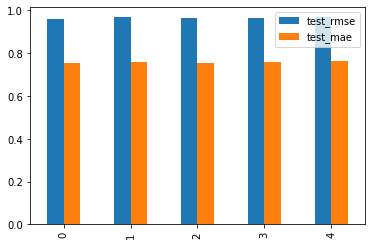

In [162]:
%matplotlib inline
import matplotlib.pyplot as plt
nmf_df.iloc[:, :2].plot(kind = 'bar')

In [163]:
from surprise.model_selection import train_test_split

In [164]:
train, test = train_test_split(data, test_size = 0.25)

In [165]:
svd.fit(train)

In [166]:
preds = svd.test(test)

In [167]:
from surprise import accuracy

In [168]:
accuracy.rmse(preds)

RMSE: 0.8678


0.867827723456951

In [169]:
uid = str(196)  # raw user id (as in the ratings file). They are **strings**!
iid = str(302)  # raw item id (as in the ratings file). They are **strings**!

# get a prediction for specific users and items.
pred = svd.predict(uid, iid, r_ui=4, verbose=True)

user: 196        item: 302        r_ui = 4.00   est = 3.50   {'was_impossible': False}


In [58]:
print(pred)

user: 196        item: 302        r_ui = 4.00   est = 3.84   {'was_impossible': False}


In [66]:
df.head(2)

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)


In [59]:
from surprise import Reader

In [85]:
reader = Reader()

In [86]:
data = Dataset.load_from_df(df.iloc[:, :-1], reader = reader)

In [87]:
cross_validate(svd, data)

{'test_rmse': array([0.8719949 , 0.87585392, 0.86781874, 0.87503108, 0.87610565]),
 'test_mae': array([0.67037158, 0.67176898, 0.66642332, 0.6717811 , 0.67489459]),
 'fit_time': (3.338887929916382,
  3.3197648525238037,
  3.3922271728515625,
  3.3798747062683105,
  3.3779220581054688),
 'test_time': (0.0782010555267334,
  0.07703590393066406,
  0.18233489990234375,
  0.07941484451293945,
  0.07984113693237305)}

##### Topic Models

In [170]:
seinfeld = pd.read_csv('data/scripts.csv.zip', compression = 'zip', index_col = 0)

In [171]:
seinfeld.head()

,Character,Dialogue,EpisodeNo,SEID,Season
0,JERRY,Do you know what this is all about? Do you kno...,1.0,S01E01,1.0
1,JERRY,"(pointing at Georges shirt) See, to me, that b...",1.0,S01E01,1.0
2,GEORGE,Are you through?,1.0,S01E01,1.0
3,JERRY,"You do of course try on, when you buy?",1.0,S01E01,1.0
4,GEORGE,"Yes, it was purple, I liked it, I dont actuall...",1.0,S01E01,1.0


In [172]:
seinfeld.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54616 entries, 0 to 54615
Data columns (total 5 columns):
Character    54616 non-null object
Dialogue     54606 non-null object
EpisodeNo    54616 non-null float64
SEID         54616 non-null object
Season       54616 non-null float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [175]:
seinfeld.groupby('Season')['EpisodeNo'].count()

Season
1.0    1308
2.0    3077
3.0    6811
4.0    7290
5.0    7228
6.0    6903
7.0    7806
8.0    6897
9.0    7296
Name: EpisodeNo, dtype: int64

In [183]:
seinfeld.loc[np.random.randint(1), 'Dialogue']

'Do you know what this is all about? Do you know, why were here? To be out, this is out...and out is one of the single most enjoyable experiences of life. People...did you ever hear people talking about We should go out? This is what theyre talking about...this whole thing, were all out now, no one is home. Not one person here is home, were all out! There are people tryin to find us, they dont know where we are. (on an imaginary phone) Did you ring?, I cant find him. Where did he go? He didnt tell me where he was going. He must have gone out. You wanna go out you get ready, you pick out the clothes, right? You take the shower, you get all ready, get the cash, get your friends, the car, the spot, the reservation...Then youre standing around, whatta you do? You go We gotta be getting back. Once youre out, you wanna get back! You wanna go to sleep, you wanna get up, you wanna go out again tomorrow, right? Where ever you are in life, its my feeling, youve gotta go.'

##### Topic Models

In [184]:
from sklearn.decomposition import LatentDirichletAllocation, NMF

In [99]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [234]:
cvect = CountVectorizer(stop_words='english', max_features = 500, ngram_range=(1, 2))

In [235]:
X = cvect.fit_transform(seinfeld.Dialogue.dropna())

In [236]:
X.shape

(54606, 500)

In [237]:
dtm = pd.DataFrame(X.toarray(), columns = cvect.get_feature_names())

In [238]:
dtm.head()

,able,actually,ago,ah,ahead,ahh,air,alright,anybody,anymore,...,yeah know,yeah right,yeah yeah,year,years,yes,yes yes,yesterday,york,youre
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [239]:
lda = LatentDirichletAllocation(n_components = 5)

In [240]:
lda.fit(X)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [241]:
import pyLDAvis

In [242]:
#!pip install pyldavis

In [243]:
import pyLDAvis.sklearn

In [244]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [246]:
print_top_words(lda, cvect.get_feature_names(), 20)

Topic #0: oh like think really good yes come look elaine don sorry nice little people god oh yeah boy coffee looks make
Topic #1: yeah kramer did hi say gotta sure doing mr ya jerry way car happened bad kind yeah yeah elaine fine went
Topic #2: right george ll jerry just want tell got let hello ah don phone door ha said elaine wanna stop head
Topic #3: know hey don gonna mean just don know huh wait great getting dont does uh time look ask guy hear second
Topic #4: going uh got ve didn okay man jerry maybe told woman new apartment believe need just im thanks hey guess



In [230]:
pyLDAvis.enable_notebook()

In [247]:
pyLDAvis.sklearn.prepare(lda, X, cvect)

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6)}

In [ ]:
tfidf = TfidfVectorizer()